In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
from skimage.color import rgb2hsv

from skimage.io import imread
from skimage.filters import threshold_multiotsu

In [2]:
def display_image(image):
    plt.figure(figsize = (15, 10))
    plt.imshow(image, cmap='gray')
    plt.show()
    
def segment_otsu(image_grayscale, img_BGR):
    
    threshold_value, threshold_image = cv2.threshold(image_grayscale, 
                                                     0, 
                                                     255,
                                                     cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    display_image(threshold_image) 
    
    threshold_image_binary =  1 - threshold_image / 255
    threshold_image_binary = np.repeat(threshold_image_binary[:, :, np.newaxis], 
                                       3, 
                                       axis=2)
    
    img_face_only = np.multiply(threshold_image_binary, 
                                img_BGR)
    
    return img_face_only


### Testes mais sérios...

In [3]:
image_rgb = imread('images/img_1.jpg')

In [4]:
image_bgr = image_rgb[:, :, ::-1]
image_hsv = rgb2hsv(image_rgb)
image_gray = rgb2gray(image_rgb)

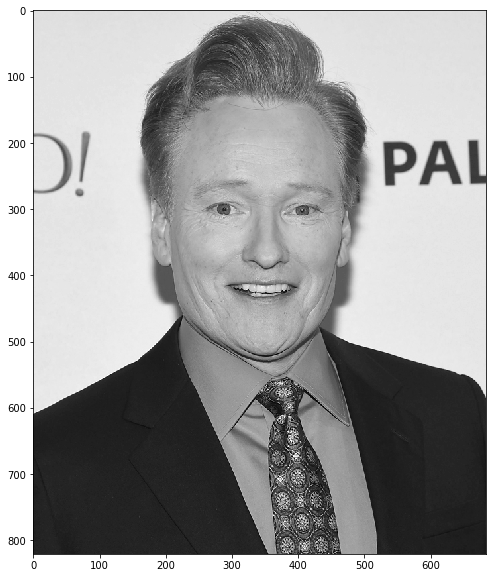

In [5]:
display_image(image_gray)

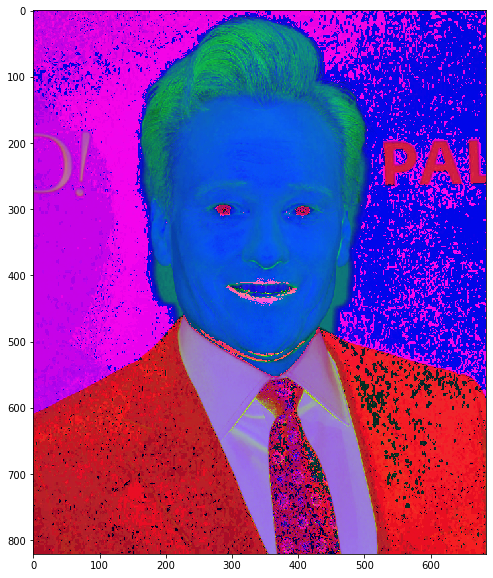

In [6]:
display_image(image_hsv)

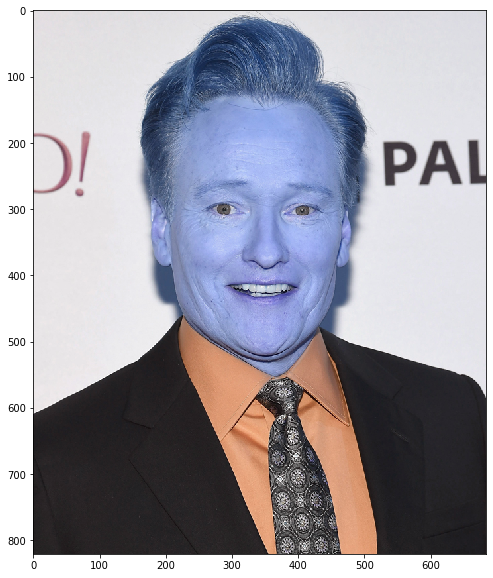

In [7]:
display_image(image_bgr)

In [9]:
thresholds = threshold_multiotsu(image_gray)
regions = np.digitize(image_gray, bins=thresholds)

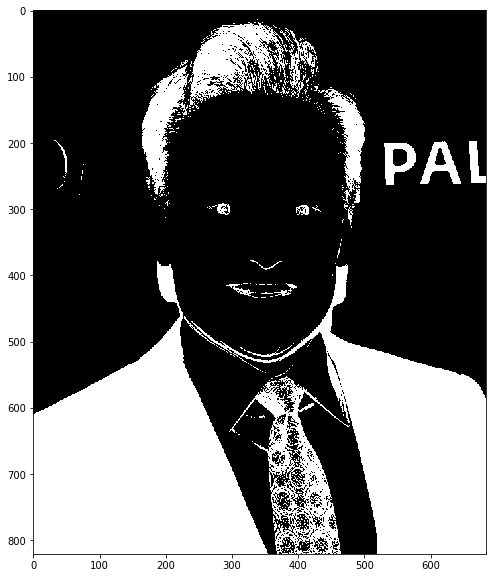

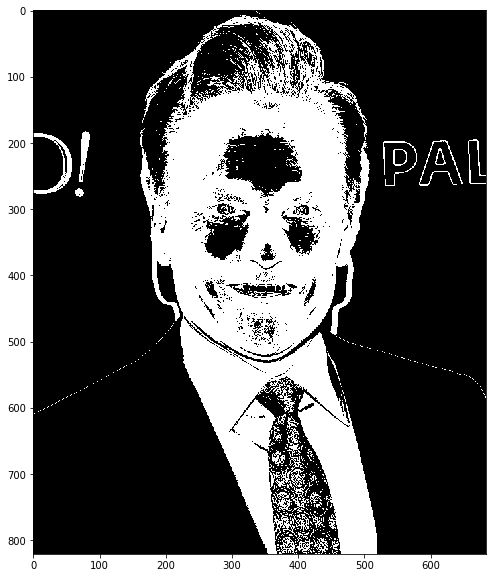

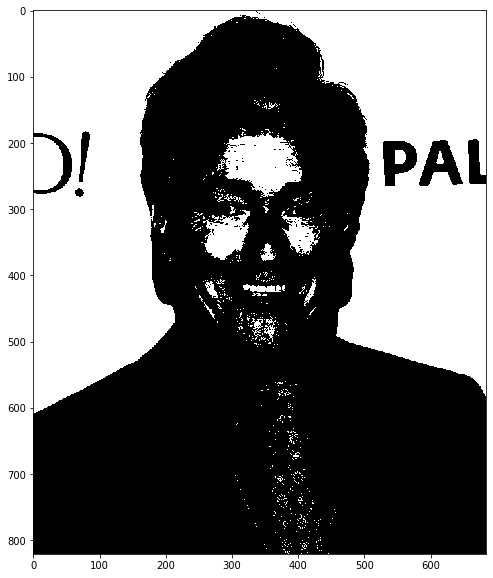

In [10]:
for index in np.unique(regions):
    display_image(regions == index)